###### <style>
div.cell, div.text_cell_render{
  max-width:750px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 140%;
  }

.rendered_html li
{
  line-height: 1.8;
  }

.rendered_html h1, h2 {
  text-align:center;
  font-familly:"Charis SIL", serif;
}
</style>

<small><i>The original notebook(s) was put together by [Jake Vanderplas](http://www.vanderplas.com) for UW's [Astro 599](http://www.astro.washington.edu/users/vanderplas/Astr599/) course. Source and license info is on [GitHub](https://github.com/jakevdp/2013_fall_ASTR599/). Some of this found its way into JVPs Practical Data Science Handbook that we are using in this course. This notebook will link to his notebooks and will also mix in some material from his notebooks. The following is a blurb from the first notebook for Ch5 of PDSH.

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# Introduction to Scikit-Learn:
## Machine Learning with Python

Scikit-learn is a collection of tools for machine learning written in Python:
[http://scikit-learn.org](http://scikit-learn.org).

Their documentation includes a nice [Quick Start](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) section as well as bunch of [tutorials introducing machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/index.html).

I also weave in some R examples to show some similarities and differences between scikit-learn and R.

## Setup and installation
If you're using [Anaconda](https://store.continuum.io/cshop/anaconda/), Scikit-learn is already installed and ready to go. That's why we use Anaconda.


## Outline

- What is machine learning?
- How is data represented in Scikit-learn?
- Introduction to the Scikit-learn API
- Basics of Machine Learning
  + Supervised learning: Classification & Regression
  + Unsupervised learning: Dimensionality Reduction & Clustering

*Much of this material is adapted from this [SciPy 2013 Tutorial](https://github.com/jakevdp/sklearn_scipy2013) by Jake Vanderplas, with Gael Varoquaux and Olivier Grisel*

## What is Machine Learning?

Let's start by taking a look at the first three notebooks in PDSH by JVP. I've revised them
slightly for our class

* [05.00-Machine-Learning](./PDSH_machine_learning/05.00-Machine-Learning.ipynb)
* [05.01-What-Is-Machine-Learning](./PDSH_machine_learning/05.01-What-Is-Machine-Learning.ipynb)
* [05.02-Introducing-Scikit-Learn](./PDSH_machine_learning/05.02-Introducing-Scikit-Learn.ipynb)

In the notebooks above, we saw both classification and regression problems as examples
of *supervised learning*. Notice how age-old techniques such as linear regression get lumped in with "machine learning". Keep that in mind. There is no magic here. We also saw examples
of *unsupervised learning* techniques such as clustering and PCA.

Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

I highly recommend spending a bunch of time with the [ISLR e-book](http://www-bcf.usc.edu/~gareth/ISL/) if you really want to start to learn how these techniques work.

In [1]:
# start the inline backend for plotting
%matplotlib inline

In [25]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Available data packaged with scikit-learn

As we've seen with many R packages, often datasets come bundled with them. In scikit-learn, they come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.

In [49]:
from sklearn import datasets

In [ ]:
datasets.load_

### More on Classification Metrics - An example using K nearest neighbors

We started learning about classification metrics when we used caret's `confusionMatrix()` function in R. Now, let's revisit this topic.

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

* predict class of new data point by majority vote of K nearest neighbors
* very simple
* good performance?

<img src="http://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg" />

Let's try it out on our iris classification problem:

In [15]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print (iris.target_names[result])

['versicolor']


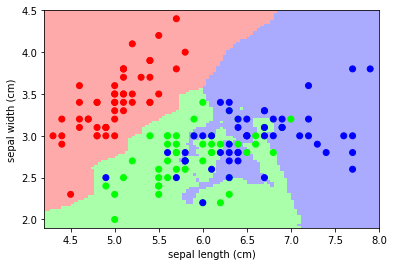

In [16]:
# Here's a 2D subset so we can try to visualize the result. 
# The colored regions are the result of the knn fitting. Any new
# point falling is classified based on which region it falls into.
# The points are the training data from the iris dataset and are shown 
# so we can see how they relate to the fitted model. Remember, in the real
# problem we used all four dimensions of our X data (sepal and petal length and width).
# Just using 2D here so that we can visualize it. You can find the source code for
# the plot_iris_knn() function in fig_code/helpers.py.
from fig_code import plot_iris_knn
plot_iris_knn()

**Exercise**: Now use as an estimator on the same problem: ``sklearn.svm.SVC``.

> Note that you don't have to know what it is do use it. It's something called a "support vector machine." See Chapter 9 in the [ISLR book](http://www-bcf.usc.edu/~gareth/ISL/).

Then let's see if it predicts the same iris type for our [3, 5, 4, 2] example.


In [6]:
from sklearn.svm import SVC

In [17]:
# Notice how steps are same: create model, fit model, predict

model = SVC()
model.fit(X, y)
result = model.predict([[3, 5, 4, 2],])
print (iris.target_names[result])

['virginica']


### A better test

Now let's break up the Iris dataset into a training and test set and see how kNN does.

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
print("X_train.shape: ",X_train.shape)
print("X_test.shape: ",X_test.shape)
print("y_train.shape: ",y_train.shape)
print("y_test.shape: ",y_test.shape)

X_train.shape:  (112, 4)
X_test.shape:  (38, 4)
y_train.shape:  (112,)
y_test.shape:  (38,)


In [20]:
# Again, create model, fit model, predict

clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# How many right, how many wrong?
print (np.sum(y_pred == y_test))
print (np.sum(y_pred != y_test))

34
4


Now we'll create a simple classification report.

In [21]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred,
                            target_names=['setosa', 'versicolor', 'virginica']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         9
 versicolor       0.94      0.85      0.89        20
  virginica       0.73      0.89      0.80         9

avg / total       0.91      0.89      0.90        38



#### Note on the meaning of these terms:

$$
{\rm precision} \equiv \frac{\rm true~positives}{\rm true~positives + false~positives}
$$

$$
{\rm recall} \equiv \frac{\rm true~positives}{\rm true~positives + false~negatives}
$$

$$ F_1 \equiv \frac{\rm precision \cdot recall}{\rm precision + recall}
$$

The range for precision, recall, and F1 score is 0 to 1, with 1 being perfect.

A nice summary is available at the mighty Wikipedia: https://en.wikipedia.org/wiki/Precision_and_recall

<img src="images/Precisionrecall.svg.png" />


## More on classification

Other classification methods include:

* logistic regression (Sec 4.3 in ISLR)
* trees and their generalizations such as random forests (Ch 8 in ISLR)
* linear discriminant analysis (Sec 4.4 in ISLR)

many more...

We'll look at a simple regression example below. Quite honestly, the `lm` and `glm` packages in R are, at this point, more familiar to me and seem easier to use for getting model diagnostics. I need to spend some more time with scikit-learn for doing regression. In this spirit, here's a nice post comparing Python and R on some simple statistics and machine learning tasks.

https://www.dataquest.io/blog/python-vs-r/

# Overfitting, Underfitting and Model Selection

The issues associated with validation and 
cross-validation are some of the most important
aspects of the practice of machine learning.  Selecting the optimal model
for your data is vital, and is a piece of the problem that is not often
appreciated by machine learning practitioners.

Of core importance is the following question:

**If our estimator is underperforming, how should we move forward?**

- Use simpler or more complicated model?
- Add more features to each observed data point?
- Add more training samples?

The answer is often counter-intuitive.  In particular, 

- **Sometimes using a
more complicated model will give _worse_ results.**   
- **Sometimes adding
training data will NOT improve your results.**  

The ability to determine
what steps will improve your model is what separates the successful machine
learning practitioners from the unsuccessful.

## Illustration of the Bias-Variance Tradeoff

For this section, we'll work with a simple 1D regression problem.  This will help us to
easily visualize the data and the model, and the results generalize easily to  higher-dimensional
datasets.  We'll explore a simple **linear regression** problem.
This can be accomplished within scikit-learn with the `sklearn.linear_model` module.

We'll create a simple nonlinear function that we'd like to fit

In [26]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

Now let's create a realization of this dataset:

In [27]:
def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    
    return X, y

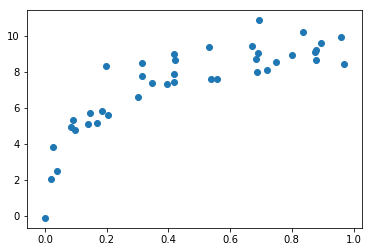

In [29]:
X, y = make_data(40, error=1)
# plt.scatter(X.ravel(), y)
plt.scatter(X, y)

In [30]:
X.shape

(40, 1)

In [31]:
X

array([[  4.17022005e-01],
       [  7.20324493e-01],
       [  1.14374817e-04],
       [  3.02332573e-01],
       [  1.46755891e-01],
       [  9.23385948e-02],
       [  1.86260211e-01],
       [  3.45560727e-01],
       [  3.96767474e-01],
       [  5.38816734e-01],
       [  4.19194514e-01],
       [  6.85219500e-01],
       [  2.04452250e-01],
       [  8.78117436e-01],
       [  2.73875932e-02],
       [  6.70467510e-01],
       [  4.17304802e-01],
       [  5.58689828e-01],
       [  1.40386939e-01],
       [  1.98101489e-01],
       [  8.00744569e-01],
       [  9.68261576e-01],
       [  3.13424178e-01],
       [  6.92322616e-01],
       [  8.76389152e-01],
       [  8.94606664e-01],
       [  8.50442114e-02],
       [  3.90547832e-02],
       [  1.69830420e-01],
       [  8.78142503e-01],
       [  9.83468338e-02],
       [  4.21107625e-01],
       [  9.57889530e-01],
       [  5.33165285e-01],
       [  6.91877114e-01],
       [  3.15515631e-01],
       [  6.86500928e-01],
 

In [32]:
X.ravel?

Docstring:
a.ravel([order])

Return a flattened array.

Refer to `numpy.ravel` for full documentation.

See Also
--------
numpy.ravel : equivalent function

ndarray.flat : a flat iterator on the array.
Type:      builtin_function_or_method


In [33]:
X.ravel().shape

(40,)

In [34]:
X.ravel()

array([  4.17022005e-01,   7.20324493e-01,   1.14374817e-04,
         3.02332573e-01,   1.46755891e-01,   9.23385948e-02,
         1.86260211e-01,   3.45560727e-01,   3.96767474e-01,
         5.38816734e-01,   4.19194514e-01,   6.85219500e-01,
         2.04452250e-01,   8.78117436e-01,   2.73875932e-02,
         6.70467510e-01,   4.17304802e-01,   5.58689828e-01,
         1.40386939e-01,   1.98101489e-01,   8.00744569e-01,
         9.68261576e-01,   3.13424178e-01,   6.92322616e-01,
         8.76389152e-01,   8.94606664e-01,   8.50442114e-02,
         3.90547832e-02,   1.69830420e-01,   8.78142503e-01,
         9.83468338e-02,   4.21107625e-01,   9.57889530e-01,
         5.33165285e-01,   6.91877114e-01,   3.15515631e-01,
         6.86500928e-01,   8.34625672e-01,   1.82882773e-02,
         7.50144315e-01])

Now say we want to perform a regression on this data.  Let's use the built-in linear regression function to compute a fit:

mean squared error: 1.78514645061


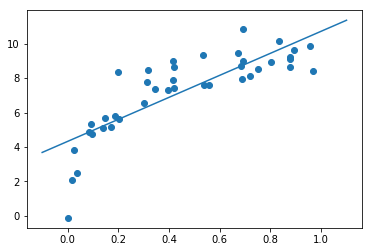

In [35]:
# Generate test data 1d array
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Initialize model object
model = LinearRegression()

# 2. Fit model using training data
model.fit(X, y)

# 3. Used fitted model to make predictions on test data
y_test = model.predict(X_test)

# Show results in scatter plot and compute MSE 
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
print ("mean squared error:", metrics.mean_squared_error(model.predict(X), y))

We have fit a straight line to the data, but clearly this model is not a good choice.  We say that this model is **biased**, or that it **under-fits** the data.

Let's try to improve this by creating a more complicated model.  We can do this by adding degrees of freedom, and computing a polynomial regression over the inputs.  Let's make this easier by creating a quick PolynomialRegression estimator. 

NOTE: This is a nice, simple, example of how to do OOP (Object Oriented Programming) in Python. Notice how the following class has a `fit` and a `predict` method, just like all the other sklearn model classes.

In [36]:
class PolynomialRegression(LinearRegression):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, **kwargs):
        self.degree = degree
        LinearRegression.__init__(self, **kwargs)
        
    def fit(self, X, y):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.fit(self, Xp, y)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.predict(self, Xp)

Now we'll use this to fit a quadratic curve to the data.

mean squared error: 0.919717192242


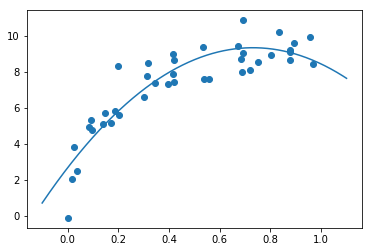

In [37]:
model = PolynomialRegression(degree=2)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
print ("mean squared error:", metrics.mean_squared_error(model.predict(X), y))

Explore a bit just to see how we are creating the X matrix for the polynomial regression.

In [38]:
np.arange(2)

array([0, 1])

In [39]:
X ** (1 + np.arange(2))

array([[  4.17022005e-01,   1.73907352e-01],
       [  7.20324493e-01,   5.18867376e-01],
       [  1.14374817e-04,   1.30815988e-08],
       [  3.02332573e-01,   9.14049845e-02],
       [  1.46755891e-01,   2.15372915e-02],
       [  9.23385948e-02,   8.52641608e-03],
       [  1.86260211e-01,   3.46928663e-02],
       [  3.45560727e-01,   1.19412216e-01],
       [  3.96767474e-01,   1.57424429e-01],
       [  5.38816734e-01,   2.90323473e-01],
       [  4.19194514e-01,   1.75724041e-01],
       [  6.85219500e-01,   4.69525764e-01],
       [  2.04452250e-01,   4.18007224e-02],
       [  8.78117436e-01,   7.71090232e-01],
       [  2.73875932e-02,   7.50080261e-04],
       [  6.70467510e-01,   4.49526682e-01],
       [  4.17304802e-01,   1.74143298e-01],
       [  5.58689828e-01,   3.12134324e-01],
       [  1.40386939e-01,   1.97084925e-02],
       [  1.98101489e-01,   3.92442000e-02],
       [  8.00744569e-01,   6.41191864e-01],
       [  9.68261576e-01,   9.37530479e-01],
       [  

This reduces the mean squared error, and makes a much better fit.  What happens if we use an even higher-degree polynomial? Try a few different values.

mean squared error: 0.478275409718


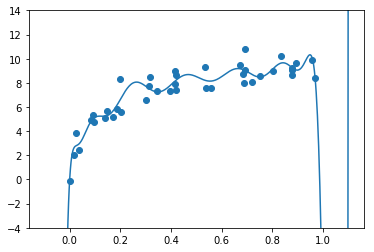

In [40]:
model = PolynomialRegression(degree=15)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.ylim(-4, 14)
print ("mean squared error:", metrics.mean_squared_error(model.predict(X), y))

When we increase the degree to this extent, it's clear that the resulting fit is no longer reflecting the true underlying distribution, but is more sensitive to the noise in the training data. For this reason, we call it a **high-variance model**, and we say that it **over-fits** the data.

Regression is a very versatile family of models and include things like:

* multiple linear regression (Ch 3 in ISLR)
* polynomial regression and splines for capturing nonlinear effects (Ch 7 in ISLR)
* ridge regression and lasso for shrinkage of coefficients to deal with the problems of multicollinearity, numerous input variables and variable selection (Ch 6 in ISLR)

## Detecting over-fitting
Clearly, computing the error on the training data is not enough (we saw this previously).  But computing this *training error* can help us determine what's going on: in particular, comparing the training error and the validation error can give you an indication of how well your data is being fit.

Let's do this:

In [41]:
np.arange(1, 30)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

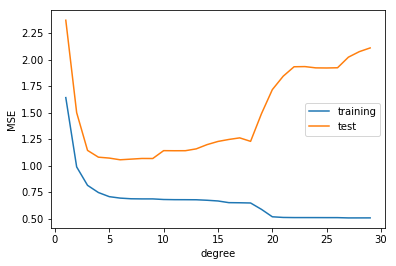

In [42]:
degrees = np.arange(1, 30) # We'll try polynomial regression models of degree 1 
                           # through degree 30

X, y = make_data(100, error=1.0) # Create synthetic data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Partition data into training and test

training_error = [] # Create empty list to hold training error values for the different models
test_error = []     # Create empty list to hold test error values for the different models

mse = metrics.mean_squared_error # Create an alias for the mean_squared_error function in metrics module

# Loop over the models
for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)        # Fit model of degree d
    training_error.append(mse(model.predict(X_train), y_train))  # Compute and save training error
    test_error.append(mse(model.predict(X_test), y_test))        # Compute and save test error
    
# note that the test error can also be computed via cross-validation

# Plot the training and test errors for all the models
plt.plot(degrees, training_error, label='training')
plt.plot(degrees, test_error, label='test')
plt.legend()
plt.xlabel('degree')
plt.ylabel('MSE')

This is a typical bias/variance plot.

On the **Left Side** of the plot, we have a **high-bias** model, characterized by the training and test data showing equally bad performance.  This shows that the model is **under-fitting** the data, because it does equally poorly on both known and unknown values.

On the **Right Side** of the plot, we have a **high-variance model**, characterized by a divergence of the training and test data.  Here the model is **over-fitting** the data: in other words, the particular noise distribution of the input data has too much effect on the result.

The optimal model here will be around the point where the **test** error is minimized.

## Illustration of Learning Curves

The exact turning-point of the tradeoff between bias and variance is highly dependent on the number of training points used.  Here we'll illustrate the use of *learning curves*, which display this property.

The idea is to plot the mean-squared-error for the training and test set as a function of **Number of Training Points**.

In [45]:
# Just to illustrate creating an array of sample sizes in training set.

X, y = make_data(200, error=1.0)
degree = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

N_range = np.linspace(15, X_train.shape[0], 20).astype(int)

N_range

array([ 15,  21,  28,  34,  41,  47,  54,  61,  67,  74,  80,  87,  93,
       100, 107, 113, 120, 126, 133, 140])

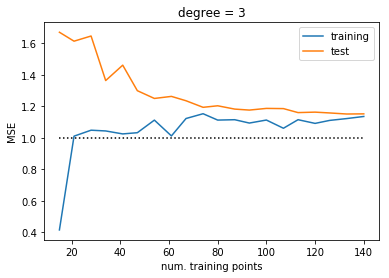

In [46]:
X, y = make_data(200, error=1.0)
degree = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

N_range = np.linspace(15, X_train.shape[0], 20).astype(int) # Array of training set sizes to use

# Function to plot the learning curve for a model of a given degree
def plot_learning_curve(degree=3):
    training_error = []
    test_error = []
    mse = metrics.mean_squared_error
    
    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
    
        model = PolynomialRegression(degree).fit(XN, yN)
        training_error.append(mse(model.predict(XN), yN))
        test_error.append(mse(model.predict(X_test), y_test))
      
    plt.plot(N_range, training_error, label='training')
    plt.plot(N_range, test_error, label='test')
    plt.plot(N_range, np.ones_like(N_range), ':k')
    plt.legend()
    plt.title('degree = {0}'.format(degree))
    plt.xlabel('num. training points')
    plt.ylabel('MSE')
    
plot_learning_curve(3)

This shows a typical learning curve: for very few training points, there is a large separation between the training and test error, which indicates **over-fitting**.  Given the same model, for a large number of training points, the training and testing errors converge, which indicates potential **under-fitting**.

It is easy to see that, in this plot, if you'd like to reduce the MSE down to the nominal value of 1.0 (which is the magnitude of the scatter we put in when constructing the data), then adding more samples will **NEVER** get you there.  For $d=3$, we've already converged.  What about for $d=2$?

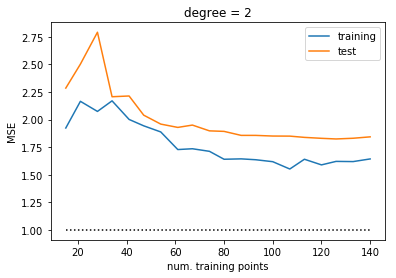

In [47]:
plot_learning_curve(2)

We see that it hasn't converged yet: you still might expect to decrease the test error by adding more points.

What about the other extreme?

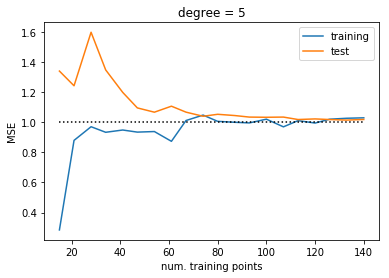

In [48]:
plot_learning_curve(5)

For $d=5$, it's converged, but to a better value than for $d=3$.

Thus you can

- **bring the two curves closer together** by adding more points, 
- but you can **bring the convergence level down** only by adding complexity to the model.

This can be very useful, because it gives you a hint about how to improve upon results which are sub-par.  To make this more concrete, imagine a predictive modeling project in which the results are not robust enough.  You must think about whether to spend your valuable data collection dollars to:

- *get more objects*, i.e. to get a larger training set, 
- or *more attributes of each object* in order to improve the model.  

The answer to this question is important, and can be addressed using these metrics.

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

## Challenge

If you'd like to try this on your own (probably after the term is over) give this assignment a try. It involves using cluster analysis and regression on a dataset from LastFM (song data).

http://nbviewer.ipython.org/github/amplab/datascience-sp14/blob/master/hw2/HW2.ipynb

It's from [https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)

* Clustering and Regression, part of the UC Berkeley 2014 Introduction to Data Science course taught by Michael Franklin.